Acadêmicos: Carlos Henrique Pociano da Silva e Vinicius Luis da Silva

GitHub Repositório: https://github.com/chsponciano/sift-opencv

**TRABALHO PARCIAL 03 – SIFT**

Questão 2) Dado um conjunto de imagens, faça a junção delas.

In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
!pip install matplotlib

In [0]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [0]:
# load image and set standard size
def get_images(paths, url=False):
    _images = []
    for img in paths:

        if url:
            _request = urllib.request.urlopen(img)
            img = np.asarray(bytearray(_request.read()), dtype="uint8")
            img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        else:
            img = cv2.imread(img)

        _images.append(cv2.copyMakeBorder(img, 400, 400, 400, 400, cv2.BORDER_CONSTANT))
    return _images

In [0]:
# convert from RGB to grayscale
def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [0]:
# get only the points with the best distance relationship
def get_only_good_matches(matches):
    return np.asarray(list(filter(lambda x: x[0].distance < 0.7 * x[1].distance, matches)))

In [0]:
# assembles to the final image
def get_mosaic(imageA, imageB, source, destine, _threshold=5.0):
    M, _masked = cv2.findHomography(source, destine, cv2.RANSAC, _threshold)
    h, w = to_gray(imageA).shape
    _new = cv2.warpPerspective(imageB, M, (w, h))
    return cv2.addWeighted(imageA, 0.5, _new, 0.8, 1)

In [0]:
# crop the final image for presentation
def crop(image, H=1000, W=500, X=350, Y=400):
    return image[Y:Y+H, X:X+W]

In [0]:
# plot the screen image
def plot(image, _crop=False):
  if _crop:
    image = crop(image)
  plt.imshow(image)
  plt.show()

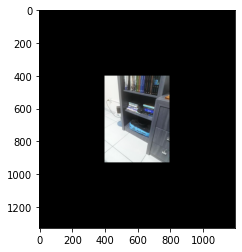

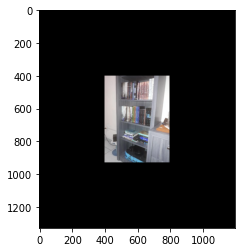

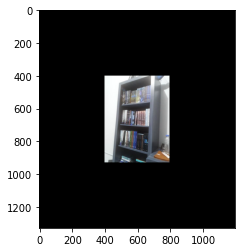

In [9]:
# name of the images in the data folder
_images = get_images(['https://raw.githubusercontent.com/chsponciano/sift-opencv/master/data/img1.jpg', 
                      'https://raw.githubusercontent.com/chsponciano/sift-opencv/master/data/img2.jpg', 
                      'https://raw.githubusercontent.com/chsponciano/sift-opencv/master/data/img3.jpg'], 
                     url=True)

plot(_images[0])
plot(_images[1])
plot(_images[2])

In [0]:
# loads Sift into memory
_sift = cv2.xfeatures2d.SIFT_create()

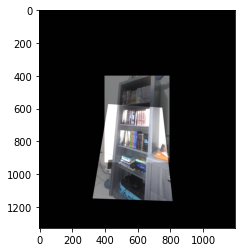

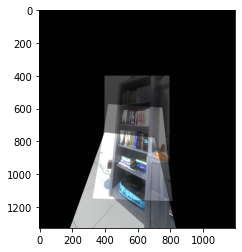

In [11]:
# repeats n pictures - 1
for i in range(len(_images) - 1):
    # takes the last two vector images
    _imgA = _images.pop()
    _imgB = _images.pop()

    # obtain keypoints and descriptors
    _keypoints1, _descriptors1 = _sift.detectAndCompute(_imgB, None)
    _keypoints2, _descriptors2 = _sift.detectAndCompute(_imgA, None)
    
    # Get valid points
    _matcher = cv2.BFMatcher()
    _matches = get_only_good_matches(_matcher.knnMatch(_descriptors1, _descriptors2, k=2))

    # validates, converts and assembles the final mosaic
    if len(_matches[:,0]) >= 4:
        _src = np.float32([_keypoints1[m.queryIdx].pt for m in _matches[:, 0]]).reshape(-1,1,2)
        _dst = np.float32([_keypoints2[m.trainIdx].pt for m in _matches[:, 0]]).reshape(-1,1,2)
        _mosaic = get_mosaic(_imgA, _imgB, _src, _dst)
        _images.append(_mosaic) # adding the image results in the array and continues the loop
    else:
        raise AssertionError('Can’t find enough keypoints.')
    
    plot(_images[-1])

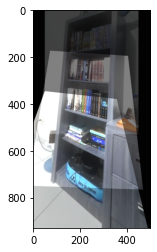

In [12]:
plot(_images[0], _crop=True)